<img src=images/ucsc_banner.png width=500>
# Visualization

Visualization is one of the best parts of data science. Visualizing data isn't just for aesthetics, it can profoundly change the way a person understands the data they're working with, in a way that is much harder to achieve by just working with numbers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

/home/richard/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from IPython.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

I have a personal preference for [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/), a statistical modeling package from Stanford for Python that is designed around working with dataframes.

In the previous module, you computed some statistics from the *E. coli* data.  Now, we'll go ahead and create visual representations of those answers.

### What is the distribution of genome sizes?

In [3]:
df = pd.read_csv('data/ecoli_cit.csv')

In [4]:
df.head()

,sample,generation,clade,strain,cit,run,genome_size
0,REL606,0,NaN,REL606,unknown,NaN,4.62
1,REL1166A,2000,unknown,REL606,unknown,SRR098028,4.63
2,ZDB409,5000,unknown,REL606,unknown,SRR098281,4.60
3,ZDB429,10000,UC,REL606,unknown,SRR098282,4.59
4,ZDB446,15000,UC,REL606,unknown,SRR098283,4.66


Let's start with just a basic scatter plot of the the genome_sizes by sample.

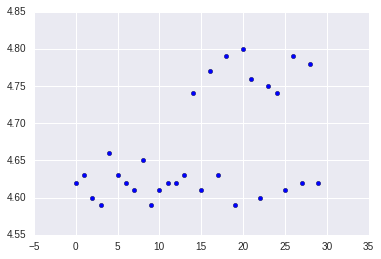

In [5]:
x = [sample for sample in xrange(len(df))] # this gets us an array of numbers from 0 to 29 for the x-axis
plt.scatter(x, df.genome_size);

We can see there's some separation to the data, let's bin these genome sizes into a histogram

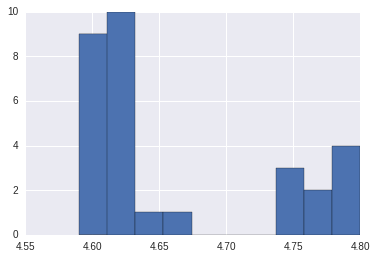

In [6]:
# the semi-colon at the end hides some unnecessary matplotlib output
plt.hist(df.genome_size); 

### Is there a relationship between genome size and Cit status?
We can use Seaborn to look at these relationships by taking advantage that the data is in a dataframe.

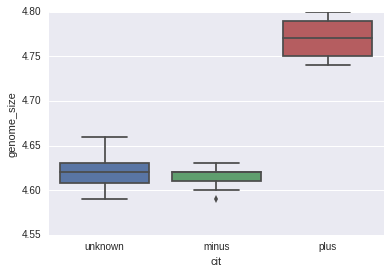

In [7]:
sns.boxplot(x='cit', y='genome_size', data=df);

Instead of boxplots, we can visualize the *densities* of the cit plus and minus distributions using our Pandas skills

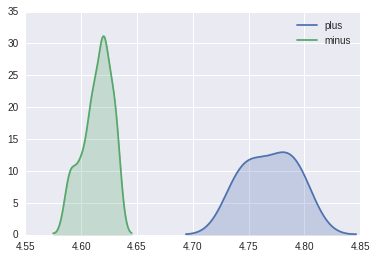

In [8]:
sns.kdeplot(df[df.cit == 'plus'].genome_size, shade=True, label='plus')
sns.kdeplot(df[df.cit == 'minus'].genome_size, shade=True, label='minus');

### Is there a relationship between genome size and generation?

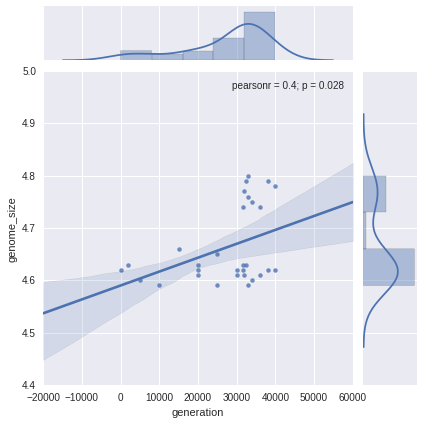

In [9]:
sns.jointplot(x='generation', y='genome_size', data=df, kind='reg');

A Pearson correlation of 0.4 isn't very strong, and we can see from the data that the disparity in the genome size happens between generations 30,000 and 40,000.  Based on the results of the above boxplots, we know that the genome size is mostly related to Cit status.

## Additional Dimensions

All of these above plots show 1 or 2 dimensions worth of data.  How would you visualize 3 dimensions? 3-dimensional plots are generally not used as ultimately they're projected onto a 2-dimensional surface which obfuscates the data its trying to represent.

*color*, *size*, and *shape* are just a few ways we can visualize additional dimesions of data without needing a 3-dimensional plot.

This additional dimension is usually for *categorical* and not *continuous* data.

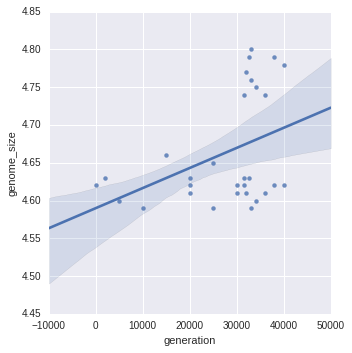

In [10]:
sns.lmplot(x='generation', y='genome_size', data=df);

This shows us a regression of generation vs. genome_size.  But how would we visualize this data with regards to the samples Cit status?

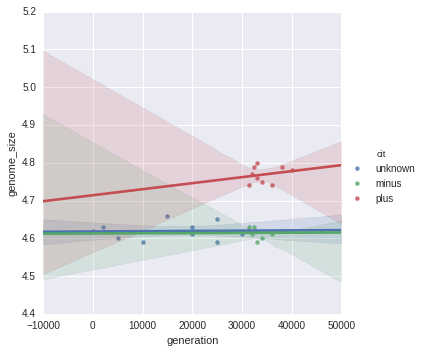

In [11]:
sns.lmplot(x='generation', y='genome_size', data=df, hue='cit');

Now we get 3 regression lines, one showing that *unknown* and *minus* are almost identical and that cit+ is distinct. 

### Tips Dataset
**Tips** is a built in dataset from seaborn, what are some interesting relationships you can discover through visualization?

In [12]:
tips = sns.load_dataset("tips")

In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


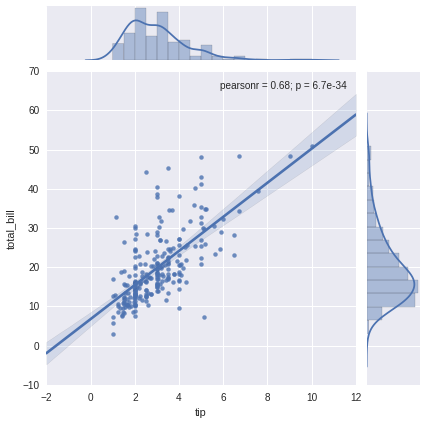

In [16]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind='reg');

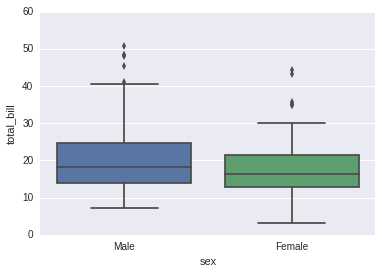

In [20]:
sns.boxplot(x='sex', y='total_bill', data=tips);

(array([  7.,  42.,  68.,  51.,  31.,  19.,  12.,   7.,   3.,   4.]),
 array([  3.07 ,   7.844,  12.618,  17.392,  22.166,  26.94 ,  31.714,
         36.488,  41.262,  46.036,  50.81 ]),
 <a list of 10 Patch objects>)

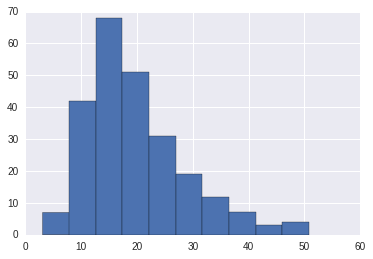

In [21]:
plt.hist(tips.total_bill)

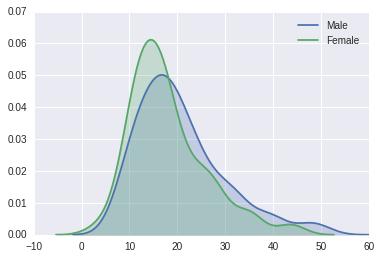

In [23]:
sns.kdeplot(tips[tips.sex == 'Male'].total_bill, shade=True, label='Male')
sns.kdeplot(tips[tips.sex == 'Female'].total_bill, shade=True, label='Female');

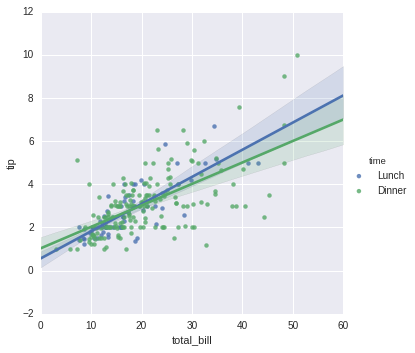

In [28]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='time');